In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('telescope_data.csv')

In [89]:
# Function to compute the covariance matrix
def compute_covariance_matrix(X):
    covariance_matrix = np.cov(X, rowvar=False)
    return covariance_matrix

# Function to compute eigenvalues and eigenvectors
def compute_eigen(X):
    eigenvalues, eigenvectors = np.linalg.eigh(X)
    return eigenvalues, eigenvectors

# Function to perform PCA
def perform_pca(data, target_variance=0.95):
    # Separate features and labels
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    
     # Standardize the features
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)

    # Check for zero standard deviation and handle it
    X_std[X_std == 0] = 1.0  # Replace zero standard deviation with 1.0 to avoid division by zero

    X_standardized = (X - X_mean) / X_std

    # Standardize the features
    #X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = compute_covariance_matrix(X_standardized)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = compute_eigen(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Determine the number of principal components to retain
    total_variance = np.sum(eigenvalues)
    current_variance = 0
    retained_components = 0

    for i in range(len(eigenvalues)):
        current_variance += eigenvalues[i]
        retained_components += 1
        if current_variance / total_variance >= target_variance:
            break

    # Retain the selected principal components
    selected_components = eigenvectors[:, :retained_components]

    # Project the data onto the selected principal components
    reduced_data = X_standardized.dot(selected_components)

    return reduced_data, y

In [90]:
# Apply PCA from scratch
reduced_data_scratch, labels = perform_pca(data)

In [91]:
from sklearn.decomposition import PCA


In [92]:
# Function to perform PCA using scikit-learn
def perform_pca_sklearn(data, target_variance=0.95):
    X = data.iloc[:, :-1].values

    # Standardize the features
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Perform PCA using scikit-learn
    pca = PCA(n_components=target_variance)
    reduced_data_sklearn = pca.fit_transform(X_standardized)

    return reduced_data_sklearn, pca

In [93]:
# Apply PCA using scikit-learn
reduced_data_sklearn, pca_model = perform_pca_sklearn(data)

# Compare the results
print("Number of components from scratch:", reduced_data_scratch.shape[1])
print("Number of components using scikit-learn:", reduced_data_sklearn.shape[1])


Number of components from scratch: 7
Number of components using scikit-learn: 7


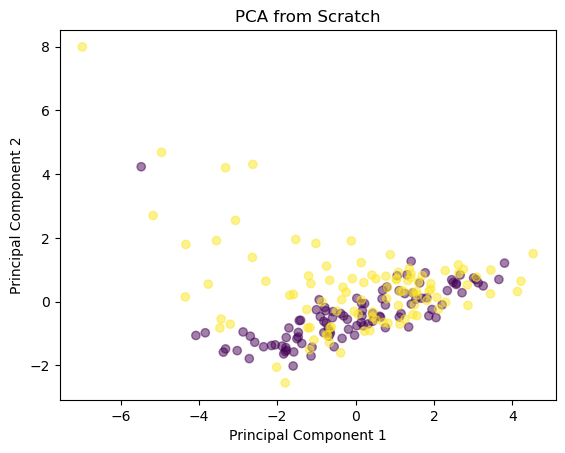

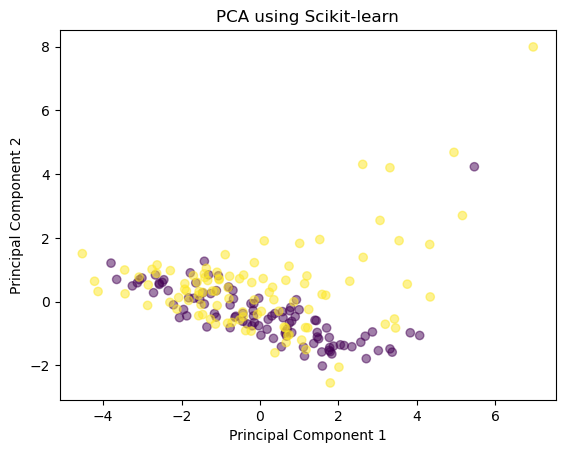

In [94]:
 
label_mapping = {'g': 0, 'h': 1}  # You might need to adjust this based on your actual labels
numeric_labels = np.array([label_mapping[label] for label in labels])

# Plotting
plt.scatter(reduced_data_scratch[:, 0], reduced_data_scratch[:, 1], c=numeric_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA from Scratch')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=numeric_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA using Scikit-learn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [95]:
# 2.1 KPCA with RBF Kernel
def rbf_kernel(X, gamma=1):
    pairwise_distances = np.square(np.linalg.norm(X[:, np.newaxis] - X, axis=2))
    return np.exp(-gamma * pairwise_distances)

# Function to perform KPCA with RBF Kernel
def perform_kpca_rbf(data, gamma=1, target_variance=0.95):
    X = data.iloc[:, :-1].values

    # Standardize the features
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the RBF kernel matrix
    rbf_matrix = rbf_kernel(X_standardized, gamma)

    # Center the kernel matrix
    n = rbf_matrix.shape[0]
    one_n = np.ones((n, n)) / n
    centered_matrix = rbf_matrix - one_n.dot(rbf_matrix) - rbf_matrix.dot(one_n) + one_n.dot(rbf_matrix).dot(one_n)

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(centered_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Determine the number of principal components to retain
    total_variance = np.sum(eigenvalues)
    current_variance = 0
    retained_components = 0

    for i in range(len(eigenvalues)):
        current_variance += eigenvalues[i]
        retained_components += 1
        if current_variance / total_variance >= target_variance:
            break

    # Retain the selected principal components
    selected_components = eigenvectors[:, :retained_components]

    # Project the data onto the selected principal components
    reduced_data = centered_matrix.dot(selected_components)
    
    return reduced_data ,selected_components


In [96]:
# Apply KPCA with RBF Kernel
reduced_data_kpca_rbf, selected_components = perform_kpca_rbf(data)
#reduced_data_kpca_rbf, rbf_matrix, selected_components = perform_kpca_rbf(data)

In [97]:
# 2.2 KPCA with Polynomial Kernel
def polynomial_kernel(X, degree=2):
    return (X.dot(X.T) + 1) ** degree

# Function to perform KPCA with Polynomial Kernel
def perform_kpca_polynomial(data, degree=2, target_variance=0.95):
    X = data.iloc[:, :-1].values

    # Standardize the features
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the polynomial kernel matrix
    poly_matrix = polynomial_kernel(X_standardized, degree)

    # Center the kernel matrix
    n = poly_matrix.shape[0]
    one_n = np.ones((n, n)) / n
    centered_matrix = poly_matrix - one_n.dot(poly_matrix) - poly_matrix.dot(one_n) + one_n.dot(poly_matrix).dot(one_n)

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(centered_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Determine the number of principal components to retain
    total_variance = np.sum(eigenvalues)
    current_variance = 0
    retained_components = 0

    for i in range(len(eigenvalues)):
        current_variance += eigenvalues[i]
        retained_components += 1
        if current_variance / total_variance >= target_variance:
            break

    # Retain the selected principal components
    selected_components = eigenvectors[:, :retained_components]

    # Project the data onto the selected principal components
    reduced_data = poly_matrix.dot(selected_components)

    return reduced_data


In [98]:
# Apply KPCA with Polynomial Kernel
reduced_data_kpca_poly = perform_kpca_polynomial(data)


In [99]:
# 2.3 KPCA with Linear Kernel
def linear_kernel(X):
    return X.dot(X.T)

# Function to perform KPCA with Linear Kernel
def perform_kpca_linear(data, target_variance=0.95):
    X = data.iloc[:, :-1].values

    # Standardize the features
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the linear kernel matrix
    linear_matrix = linear_kernel(X_standardized)

    # Center the kernel matrix
    n = linear_matrix.shape[0]
    one_n = np.ones((n, n)) / n
    centered_matrix = linear_matrix - one_n.dot(linear_matrix) - linear_matrix.dot(one_n) + one_n.dot(linear_matrix).dot(one_n)

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(centered_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Determine the number of principal components to retain
    total_variance = np.sum(eigenvalues)
    current_variance = 0
    retained_components = 0

    for i in range(len(eigenvalues)):
        current_variance += eigenvalues[i]
        retained_components += 1
        if current_variance / total_variance >= target_variance:
            break

    # Retain the selected principal components
    selected_components = eigenvectors[:, :retained_components]

    # Project the data onto the selected principal components
    reduced_data = linear_matrix.dot(selected_components)

    return reduced_data

In [100]:
# Apply KPCA with Linear Kernel
reduced_data_kpca_linear = perform_kpca_linear(data)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Module 3.1: Split the dataset into train and test datasets

# Assuming 'data' is the preprocessed dataset and 'labels' are the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data.iloc[:, -1].values, test_size=0.2, random_state=42)

# Module 3.1: Apply PCA and KPCA models on the training and test datasets

# 3.1.1: Apply PCA
reduced_train_pca, _ = perform_pca(pd.DataFrame(np.column_stack((X_train, y_train))))
reduced_test_pca = pca_model.transform(X_test)

# 3.1.2: Apply KPCA with RBF Kernel
reduced_train_kpca_rbf = perform_kpca_rbf(pd.DataFrame(np.column_stack((X_train, y_train))))
reduced_test_kpca_rbf = perform_kpca_rbf(pd.DataFrame(np.column_stack((X_test, y_test))))

# 3.1.3: Apply KPCA with Polynomial Kernel
reduced_train_kpca_poly = perform_kpca_polynomial(pd.DataFrame(np.column_stack((X_train, y_train))))
reduced_test_kpca_poly = perform_kpca_polynomial(pd.DataFrame(np.column_stack((X_test, y_test))))

# 3.1.4: Apply KPCA with Linear Kernel
reduced_train_kpca_linear = perform_kpca_linear(pd.DataFrame(np.column_stack((X_train, y_train))))
reduced_test_kpca_linear = perform_kpca_linear(pd.DataFrame(np.column_stack((X_test, y_test))))

# Module 3.2: Classification Experiment

# 3.2.1: Classification using PCA
predicted_labels_pca = myclassifier(reduced_train_pca, y_train, reduced_test_pca)

# 3.2.2: Classification using KPCA with RBF Kernel
predicted_labels_kpca_rbf = myclassifier(reduced_train_kpca_rbf, y_train, reduced_test_kpca_rbf)

# 3.2.3: Classification using KPCA with Polynomial Kernel
predicted_labels_kpca_poly = myclassifier(reduced_train_kpca_poly, y_train, reduced_test_kpca_poly)

# 3.2.4: Classification using KPCA with Linear Kernel
predicted_labels_kpca_linear = myclassifier(reduced_train_kpca_linear, y_train, reduced_test_kpca_linear)

# Module 3.2: Calculate and compare accuracy

# 3.2.1: Accuracy for PCA
accuracy_pca = accuracy_score(y_test, predicted_labels_pca)
print("Accuracy using PCA:", accuracy_pca)

# 3.2.2: Accuracy for KPCA with RBF Kernel
accuracy_kpca_rbf = accuracy_score(y_test, predicted_labels_kpca_rbf)
print("Accuracy using KPCA with RBF Kernel:", accuracy_kpca_rbf)

# 3.2.3: Accuracy for KPCA with Polynomial Kernel
accuracy_kpca_poly = accuracy_score(y_test, predicted_labels_kpca_poly)
print("Accuracy using KPCA with Polynomial Kernel:", accuracy_kpca_poly)

# 3.2.4: Accuracy for KPCA with Linear Kernel
accuracy_kpca_linear = accuracy_score(y_test, predicted_labels_kpca_linear)
print("Accuracy using KPCA with Linear Kernel:", accuracy_kpca_linear)


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method